# 과제 1. 

* 관심 있는 주제 : 고객 분석 ex. 신규 상품 가입 가능성이 높은 고객 예측, 대출상환 분석, 고객 맞춤 서비스 추천, 이상거래 탐지 등
* 이유 : 경제학과를 복수전공하면서 금융권 취업을 희망하고, 해당 도메인 지식을 넓히고 싶기 때문이다.
* 데이터(채무상환 여부 예측) : [Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk/data) 

# 과제 2. 따릉이 대여량 데이터를 가지고 EDA 진행하기

## 라이브러리 불러오기

* `pandas` : 데이터 분석 라이브러리
* `numpy` : 다양한 계산과 분석 라이브러리
* `matplotlib` : 시각화 도구 제공
* `seaborn` : 더 정돈된 시각화 도구

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config inlineBackend.figure_format = 'retina'

## 데이터 불러오기 : 따릉이 대여량 데이터(2017.12~2018.11)

### 주제 : 따릉이 대여량 예측

- Date : 대여 날짜(MM/DD/YY)
- Rented Bike Count : 시간대별 자전거 대여량 / `종속변수`
- Hour : 대여 시간(0시~23시)
- Temperature : 기온
- Humidity : 습도
- Wind speed : 풍속
- Visibility : 가시성
- Dew point temperature : 이슬점 온도(수증기의 응결이 시작되는 온도)
- Solar Radiation : 태양복사열
- Rainfall : 강수량
- Snowfall : 적설량
- Seasons : 계절
- Holiday : 공휴일 유무
- Functioning day : 운영일

In [3]:
data = pd.read_csv('C:/Users/82105/Desktop/2023-겨울/비어플/SeoulBikeData.csv', encoding='cp949')
data
#Encoding 에러 떴을 때 : encoding = 'cp949' 

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## EDA

In [4]:
# 4열부터 11열까지 칼럼명 수정하기
data.columns[3:]
for col in data.columns[3:]:
    data.rename(columns={col: col.split('(')[0].strip()}, inplace=True)

data

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
#앞의 행 5개 추출
data.head() #2017년 12월부터 

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#뒤의 행 5개 추출
data.tail() #2018년 11월 30일까지 총 1년동안의 데이터 #빈 행이 없는 것을 확인

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
data.info() #8760행, 14열 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [7]:
# 결측치 확인
data.isna().sum() #NA가 없는 것을 확인할 수 있음

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

In [8]:
# 기술통계량 확인
data.describe() 

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
# 중복 행 확인
data[data.duplicated()] #중복 행이 없음

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day


In [10]:
# 상관계수 확인
data.corr()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


Text(0.5, 1.0, 'correlation heatmap')

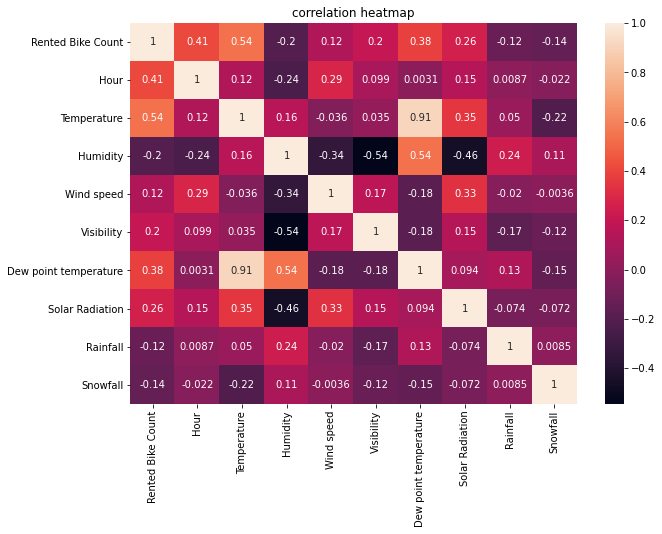

In [11]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(10,7)) #사이즈 조정
sns.heatmap(data.corr(), annot=True)
plt.title('correlation heatmap')

# Temperature와 Dew point temperature 간에 뚜렷한 양의 상관관계 (0.91)
# Temperature와 Rented Bike Count 간에 양의 상관관계 (0.54)
# Dew point temperature와 Humidity 간에 양의 상관관계 (0.54)
# Hour와 Rented Bike Count 간에 양의 상관관계 (0.41)
# Visibility와 Humidity 간에 음의 상관관계 (-0.54)
# Solar Radiation과 Humidity 간에 음의 상관관계 (-0.46)
# Humidity와 Wind speed 간에 음의 상관 관계 (-0.34)

# 온도, 시간대, 이슬점 온도 순으로 자전거 대여량과 상관관계가 높다고 볼 수 있음

### 세션 때 타이타닉 데이터를 가지고 변수별로 EDA를 진행한 방식으로 과제를 풀이하다가 마지막 변수인 
### `Functioning Day가 No인 경우(대여 서비스를 운영하지 않는 경우)를 제외`해야 한다고 판단하였음


## Functioning Day(운영일)

* 대여 서비스 운영일인 경우가 데이터의 대부분을 차지함.
* 운영하지 않는 경우의 계절은 봄과 가을임.

In [5]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [6]:
# Yes와 No 구분해보기
data_func_y = data[data['Functioning Day'] == 'Yes']
data_func_y

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [67]:
data_func_y['Seasons'].value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

In [7]:
data_func_n = data[data['Functioning Day'] == 'No']
data_func_n

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [69]:
data_func_n['Seasons'].value_counts()

# Yes 와 No를 비교한 결과, Yes는 자전거 대여 서비스를 운영한 경우를 뜻하고, No는 운영하지 않은 것을 의미한다.
# Holiday와는 상관이 없어 보임
# No의 경우 시작 계절이 Spring이라 계절에 따른 빈도 분석을 진행하였음
# 그 결과 Yes는 사계절이 모두 포함된 반면, No의 경우 봄과 가을만 포함됨.

Autumn    247
Spring     48
Name: Seasons, dtype: int64

In [8]:
# Functioning day == No 인 행 제거하기
data2 = data[data['Functioning Day'] == 'Yes']
data3 = data2.reset_index(drop=True) #인덱스 재정렬
data3

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8461,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8462,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8463,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
# 다시 기초통계분석하기
print(data3.shape)

display(data3.head())
display(data3.tail())

print(data3.info())
display(data3.describe())

display(data3.corr())

(8465, 14)


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
8460,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8461,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8462,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8463,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8464,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8465 non-null   object 
 1   Rented Bike Count      8465 non-null   int64  
 2   Hour                   8465 non-null   int64  
 3   Temperature            8465 non-null   float64
 4   Humidity               8465 non-null   int64  
 5   Wind speed             8465 non-null   float64
 6   Visibility             8465 non-null   int64  
 7   Dew point temperature  8465 non-null   float64
 8   Solar Radiation        8465 non-null   float64
 9   Rainfall               8465 non-null   float64
 10  Snowfall               8465 non-null   float64
 11  Seasons                8465 non-null   object 
 12  Holiday                8465 non-null   object 
 13  Functioning Day        8465 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 926.0+ 

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000


,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
Rented Bike Count,1.000000,0.425256,0.562740,-0.201973,0.125022,0.212323,0.400263,0.273862,-0.128626,-0.151611
Hour,0.425256,1.000000,0.122742,-0.235937,0.287780,0.103869,0.004691,0.144658,0.014345,-0.022082
Temperature,0.562740,0.122742,1.000000,0.166425,-0.038481,0.028262,0.914467,0.354844,0.052149,-0.217746
Humidity,-0.201973,-0.235937,0.166425,1.000000,-0.337352,-0.548542,0.539402,-0.457273,0.236917,0.110127
Wind speed,0.125022,0.287780,-0.038481,-0.337352,1.000000,0.180428,-0.177170,0.326222,-0.024931,-0.003789
Visibility,0.212323,0.103869,0.028262,-0.548542,0.180428,1.000000,-0.182586,0.153046,-0.170352,-0.122860
Dew point temperature,0.400263,0.004691,0.914467,0.539402,-0.177170,-0.182586,1.000000,0.098525,0.126812,-0.149760
Solar Radiation,0.273862,0.144658,0.354844,-0.457273,0.326222,0.153046,0.098525,1.000000,-0.074157,-0.073380
Rainfall,-0.128626,0.014345,0.052149,0.236917,-0.024931,-0.170352,0.126812,-0.074157,1.000000,0.008604
Snowfall,-0.151611,-0.022082,-0.217746,0.110127,-0.003789,-0.122860,-0.149760,-0.073380,0.008604,1.000000


Text(0.5, 1.0, 'correlation heatmap')

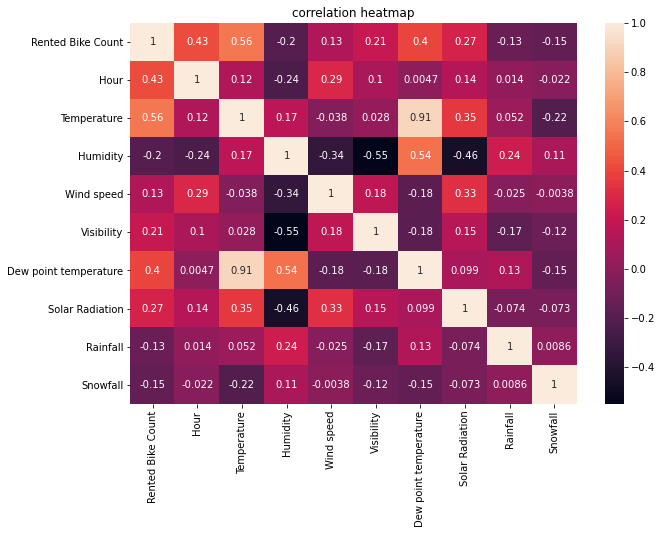

In [85]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(10,7)) #사이즈 조정
sns.heatmap(data3.corr(), annot=True)
plt.title('correlation heatmap')

# 온도, 대여 시간대, 이슬점온도, 태양 복사열 순으로 자전거 대여량과 선형적인 관계가 뚜렷함을 알 수 있다.
# 온도와 이슬점온도 간의 상관계수는 0.91로 뚜렷한 양의 상관관계를 가진다.
# 이슬점온도와 습도 간의 상관계수는 0.54로 양의 상관관계를 가진다.
# 가시성과 습도 간의 상관계수는 -0.55로 음의 상관관계를 가진다.

## 종속변수 Rented Bike Count(자전거 대여량)

In [86]:
data3['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8460    1003
8461     764
8462     694
8463     712
8464     584
Name: Rented Bike Count, Length: 8465, dtype: int64

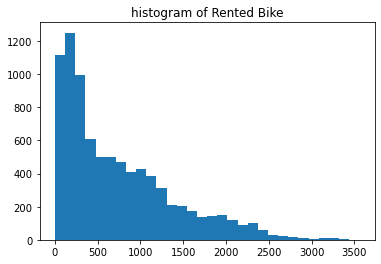

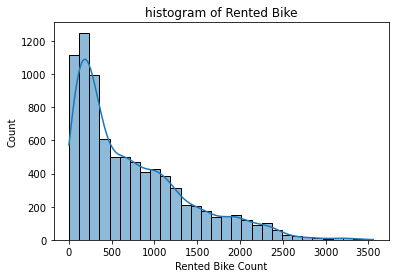

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


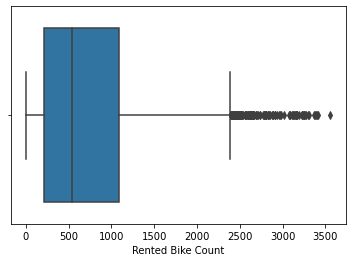

In [87]:
# 분포 확인하기
# 시각화 : 히스토그램
# plt 라이브러리 사용
plt.hist(data3['Rented Bike Count'], bins=30)
plt.title('histogram of Rented Bike', fontsize=12)
plt.show()

#sns 라이브러리 사용
sns.histplot(data3['Rented Bike Count'], bins=30, kde=True)
plt.title('histogram of Rented Bike', fontsize=12)
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Rented Bike Count'])
plt.show()

# 자전거 대여량의 분포는 오른쪽으로 skew 되어 있는 것을 확인할 수 있음
# 박스플롯을 통해 이상치가 존재함을 확인할 수 있음

## Hour(대여 시간)

* 출퇴근시간대인 18시, 19시, 17시, 20시, 21시, 8시 순으로 평균 자전거 대여량이 높게 나타남.
* 대여량 변수와의 상관계수 : 0.46

In [88]:
data3['Hour'].value_counts().sort_index() #0시부터 23시까지 있음 #범주형 변수

0     352
1     352
2     352
3     352
4     352
5     352
6     352
7     353
8     353
9     353
10    353
11    353
12    353
13    353
14    353
15    353
16    353
17    353
18    353
19    353
20    353
21    353
22    353
23    353
Name: Hour, dtype: int64

Text(0.5, 1.0, 'the number of rented bike by hour')

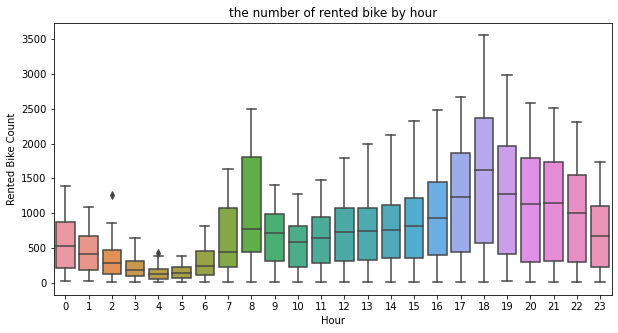

In [89]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 박스플롯
plt.figure(figsize=(10,5))
sns.boxplot(x='Hour', y='Rented Bike Count', data=data3)
plt.title('the number of rented bike by hour')

# 박스플롯을 통해 중위수가 가장 높은 대여시간대는 18시임을 알 수 있다. 
# 대여량의 최댓값이 있는 시간대 역시 18시이다.

In [90]:
# 평균 자전거 대여량과의 관계 살펴보기
print(data3.groupby('Hour').mean()['Rented Bike Count'].sort_values(ascending=False)) #출퇴근시간대 평균대여량이 높게 나타남.

Hour
18    1554.016997
19    1235.776204
17    1177.212465
20    1105.303116
21    1066.512748
8     1050.229462
16     962.257790
22     954.167139
15     857.373938
14     784.620397
13     758.172805
12     723.218130
23     693.940510
9      667.943343
7      626.606232
11     621.277620
0      561.457386
10     545.764873
1      441.923295
2      312.769886
6      298.184659
3      210.840909
5      144.218750
4      137.488636
Name: Rented Bike Count, dtype: float64


In [10]:
# 시간대별 평균대여량을 data_mean_hour이라는 새로운 데이터프레임에 저장 
data_mean_hour = pd.DataFrame(data3.groupby('Hour').mean()['Rented Bike Count'])
data_mean_hour = data_mean_hour.reset_index()
data_mean_hour

,Hour,Rented Bike Count
0,0,561.457386
1,1,441.923295
2,2,312.769886
3,3,210.840909
4,4,137.488636
5,5,144.218750
6,6,298.184659
7,7,626.606232
8,8,1050.229462
9,9,667.943343


Text(0, 0.5, 'mean of the number of rented bike')

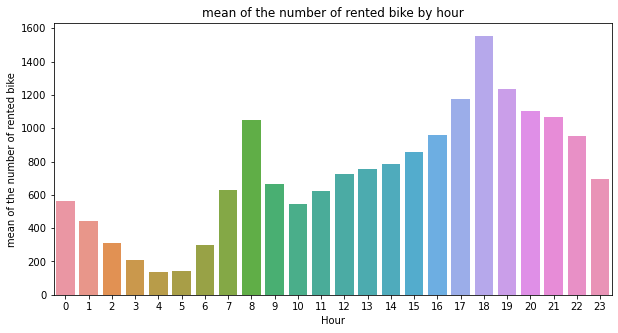

In [11]:
# 시각화 : 막대그래프
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Rented Bike Count', data=data_mean_hour)
plt.title('mean of the number of rented bike by hour')
plt.ylabel('mean of the number of rented bike')

## Temperature(기온)

* 기온이 높아짐에 따라 대여량이 증가하는 추세를 보인다. (30도 이상이 되면 약간 감소한다.)
* 20도 이상 30도 미만 그룹의 경우 평균 대여량이 가장 높게 나타난다.
* 대여량 변수와의 상관계수 : 0.56

In [93]:
data3['Temperature'] #수치형(연속형) 변수

0      -5.2
1      -5.5
2      -6.0
3      -6.2
4      -6.0
       ... 
8460    4.2
8461    3.4
8462    2.6
8463    2.1
8464    1.9
Name: Temperature, Length: 8465, dtype: float64

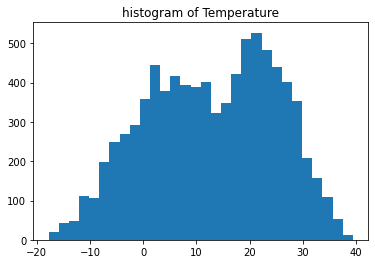

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


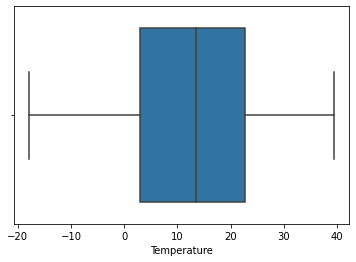

In [94]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Temperature'], bins=30)
plt.title('histogram of Temperature', fontsize=12)
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Temperature'])
plt.show()

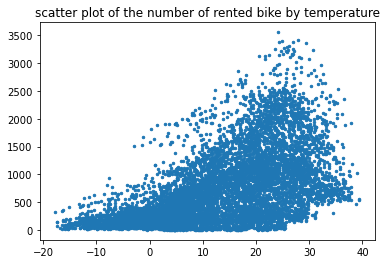

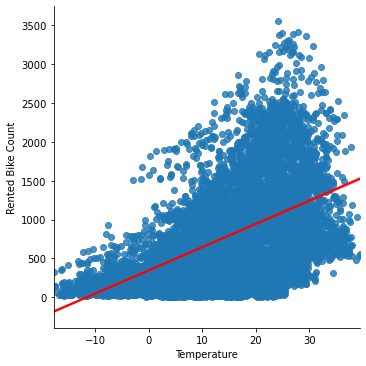

In [95]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3.Temperature, data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by temperature')
sns.lmplot(x='Temperature', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 20도 이상 30도 미만의 경우 대여량의 최댓값이 위치해 있다.

-17.8
39.4


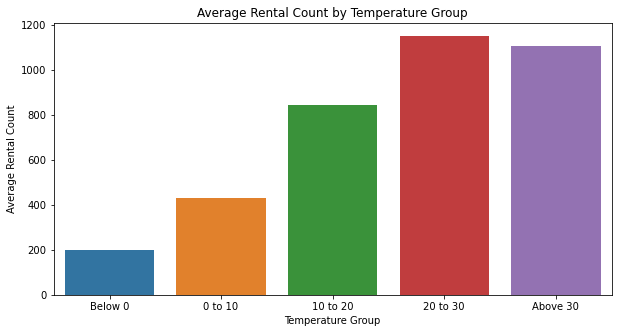

Text(0.5, 1.0, 'The number of bike rental by temperature')

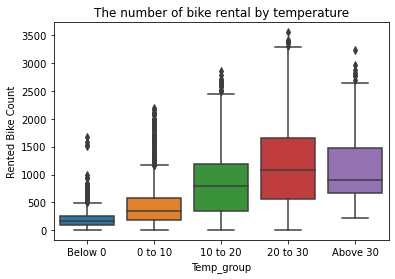

In [96]:
# 기온을 범주화하여 분석해보기
print(min(data3['Temperature']))
print(max(data3['Temperature']))

# -20도 이상 0도 미만, 0도 이상 10도 미만, 10도 이상 20도 미만, 20도 이상 30도 미만, 30도 이상으로 구간을 나누기
bins = [-float('inf'), 0, 10, 20, 30, float('inf')]
labels = ['Below 0', '0 to 10', '10 to 20', '20 to 30', 'Above 30'] # 각 구간의 라벨 설정
data3['Temp_group'] = pd.cut(data3['Temperature'], bins=bins, labels=labels, include_lowest=True)

# 기온그룹별 평균 자전거 대여량 계산
data_temp_group = data3.groupby('Temp_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Temp_group', y='Rented Bike Count', data=data_temp_group)
plt.title('Average Rental Count by Temperature Group')
plt.xlabel('Temperature Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Temp_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by temperature')

# 박스플롯을 통해 대여량의 중위수가 '20 to 30' 그룹까지는 증가하지만, 30도가 넘어가면 약간 감소하는 것을 확인할 수 있음.

## Humidity(습도)

* 0%~ 80% 습도일 때는 자전거 대여량에 영향을 크게 미치지 않는다. (80% 이상인 경우 대여량은 감소한다.)
* 범주화하여 그룹별로 비교하였을 때 적정 습도인 40%~60% 그룹의 평균 대여량이 가장 높게 나타난다.
* 대여량 변수와의 상관계수 : -0.2로 약한 음의 상관관계가 있다.(습도가 높아질수록 대여량이 적게 나타남. -> 습도가 높아지면 강수 확률이 높아지기 때문이라고 해석할 수 있음.)

In [97]:
data3['Humidity'] #수치형(연속형) 변수

0       37
1       38
2       39
3       40
4       36
        ..
8460    34
8461    37
8462    39
8463    41
8464    43
Name: Humidity, Length: 8465, dtype: int64

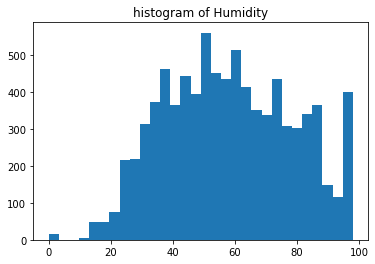

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


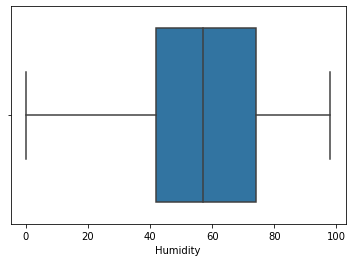

In [99]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Humidity'], bins=30)
plt.title('histogram of Humidity', fontsize=12)
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Humidity'])
plt.show()

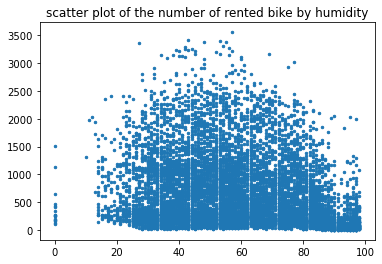

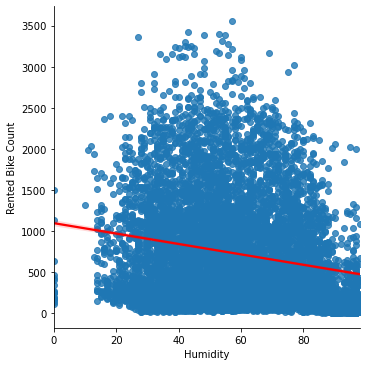

In [100]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3.Humidity, data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by humidity')
sns.lmplot(x='Humidity', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 습도와 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

0
98


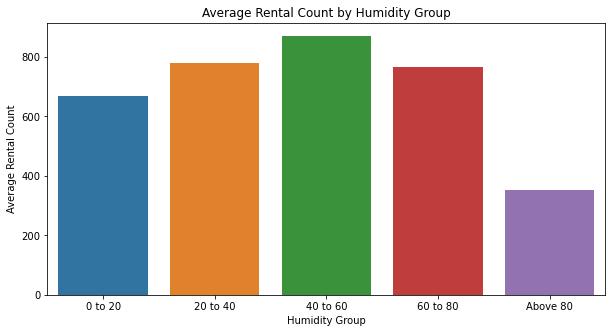

Text(0.5, 1.0, 'The number of bike rental by humidity')

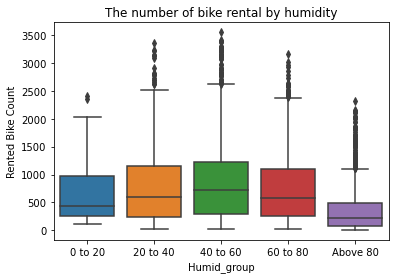

In [101]:
# 습도 범주화하여 분석해보기
print(min(data3['Humidity']))
print(max(data3['Humidity']))

# 0% 이상 20% 미만, 20% 이상 40% 미만, 40% 이상 60% 미만, 60% 이상 80% 미만, 80% 이상으로 구간을 나누기
bins = [-float('inf'), 20, 40, 60, 80, float('inf')]
labels = ['0 to 20', '20 to 40', '40 to 60', '60 to 80', 'Above 80'] # 각 구간의 라벨 설정
data3['Humid_group'] = pd.cut(data3['Humidity'], bins=bins, labels=labels, include_lowest=True)

# 습도그룹별 평균 자전거 대여량 계산
data_humid_group = data3.groupby('Humid_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Humid_group', y='Rented Bike Count', data=data_humid_group)
plt.title('Average Rental Count by Humidity Group')
plt.xlabel('Humidity Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Humid_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by humidity')

# 박스플롯을 통해 0%~80% 까지는 대여량의 중위수에 큰 차이가 나지 않는다. 그러나 80%가 넘어가면 중위수가 감소한 것을 확인할 수 있다.

## Wind speed(풍속)

* 자전거 대여량에 영향을 크게 미치지 않는다.
* 대여량 변수와의 상관계수 : 0.13
* 범주화하여 분석한 결과 풍속이 1.5이상 3미만인 경우 평균 대여량이 가장 높게 나타났다.

In [102]:
data3['Wind speed'] #수치형(연속형) 변수

0       2.2
1       0.8
2       1.0
3       0.9
4       2.3
       ... 
8460    2.6
8461    2.3
8462    0.3
8463    1.0
8464    1.3
Name: Wind speed, Length: 8465, dtype: float64

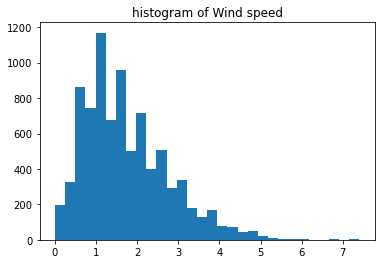

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


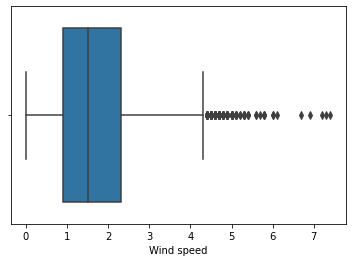

In [103]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Wind speed'], bins=30)
plt.title('histogram of Wind speed', fontsize=12) #오른쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Wind speed'])
plt.show() #이상치 존재

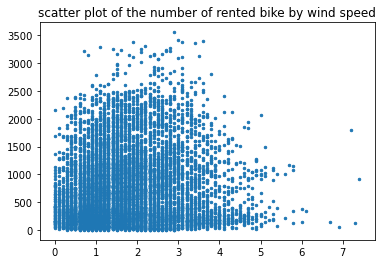

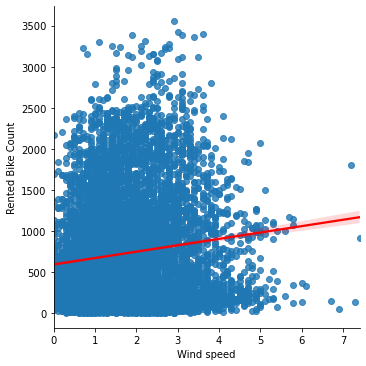

In [104]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Wind speed'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by wind speed')
sns.lmplot(x='Wind speed', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 풍속과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

0.0
7.4


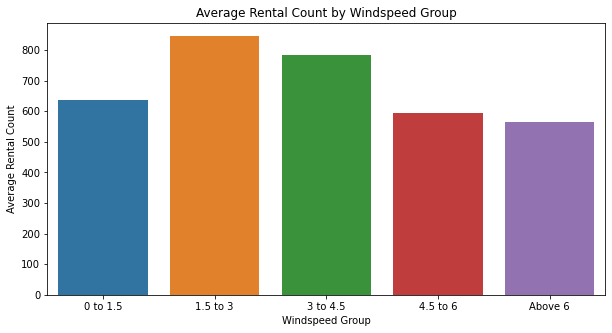

Text(0.5, 1.0, 'The number of bike rental by windspeed')

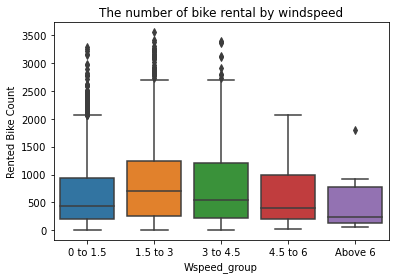

In [105]:
# 풍속을 범주화하여 분석해보기
print(min(data3['Wind speed'])) 
print(max(data3['Wind speed'])) 

# 0 이상 1.5 미만, 1.5 이상 3 미만, 3 이상 4.5 미만, 4.5 이상 6 미만, 6 이상으로 구간을 나누기
bins = [-float('inf'), 1.5, 3, 4.5, 6, float('inf')]
labels = ['0 to 1.5', '1.5 to 3', '3 to 4.5', '4.5 to 6', 'Above 6'] # 각 구간의 라벨 설정
data['Wspeed_group'] = pd.cut(data3['Wind speed'], bins=bins, labels=labels, include_lowest=True)

# 풍속그룹별 평균 자전거 대여량 계산
data_wspeed_group = data3.groupby('Wspeed_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Wspeed_group', y='Rented Bike Count', data=data_wspeed_group)
plt.title('Average Rental Count by Windspeed Group')
plt.xlabel('Windspeed Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Wspeed_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by windspeed')

# 막대그래프를 통해 풍속이 '1.5 to 3'인 경우 평균 대여량이 가장 높은 것을 확인할 수 있다.
# 박스플롯을 통해 풍속이 '1.5 to 3'인 경우 대여량의 중위수가 가장 높은 것을 확인할 수 있다.

## Visibility(가시성)

* 자전거 대여량에 크게 영향을 미치지 않는다.
* 대여량 변수와의 상관계수 : 0.21
* 범주화하여 분석한 결과, 가시성이 2000일 때 평균 대여량이 가장 높게 나타났다.

In [106]:
data3.Visibility #수치형(연속형) 변수

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
8460    1894
8461    2000
8462    1968
8463    1859
8464    1909
Name: Visibility, Length: 8465, dtype: int64

In [111]:
data3.Visibility.value_counts() #2000이 많은 것 같아서 빈도분석해봄 #2000이 전체 데이터의 약 25%을 차지함.

2000    2150
1995      32
1989      27
1985      27
1996      27
        ... 
225        1
571        1
135        1
119        1
72         1
Name: Visibility, Length: 1780, dtype: int64

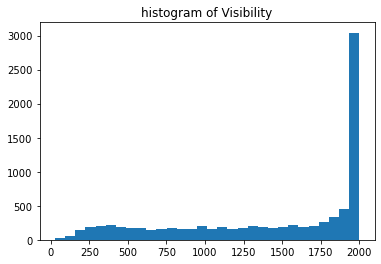

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


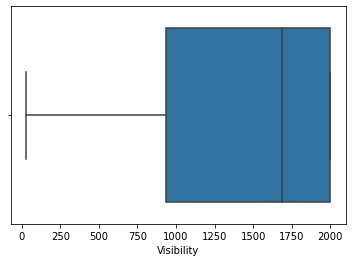

In [109]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Visibility'], bins=30)
plt.title('histogram of Visibility', fontsize=12) #왼쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Visibility'])
plt.show()

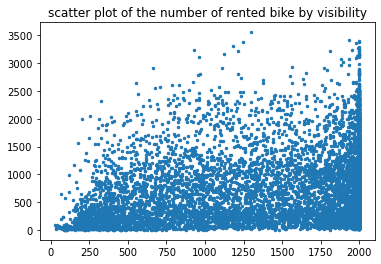

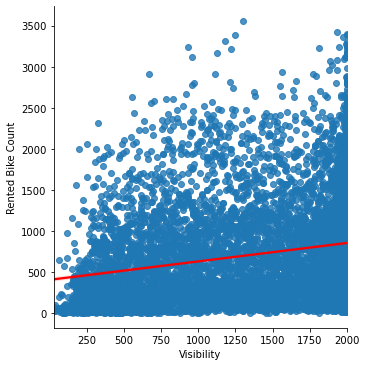

In [110]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Visibility'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by visibility')
sns.lmplot(x='Visibility', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 가시성과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

27
2000


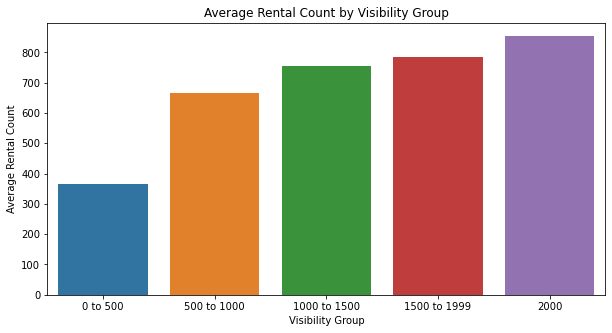

Text(0.5, 1.0, 'The number of bike rental by visibility')

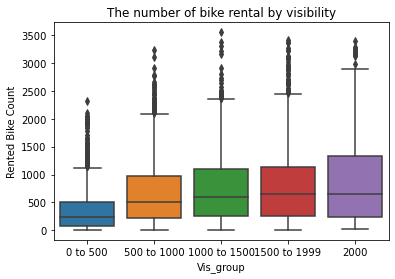

In [119]:
# 가시성을 범주화하여 분석해보기
print(min(data3['Visibility'])) 
print(max(data3['Visibility'])) 

# 0 이상 500 미만, 500 이상 1000 미만, 1000 이상 1500 미만, 1500 이상 2000 미만, 2000으로 구간을 나누기
bins = [-float('inf'), 500, 1000, 1500, 1999, float('inf')]
labels = ['0 to 500', '500 to 1000', '1000 to 1500', '1500 to 1999', '2000'] # 각 구간의 라벨 설정
data3['Vis_group'] = pd.cut(data3['Visibility'], bins=bins, labels=labels, include_lowest=True)

# 가시성그룹별 평균 자전거 대여량 계산
data_vis_group = data3.groupby('Vis_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Vis_group', y='Rented Bike Count', data=data_vis_group)
plt.title('Average Rental Count by Visibility Group')
plt.xlabel('Visibility Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Vis_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by visibility')

# 가시성이 2000이었을 때 평균 대여량이 가장 높음
# '0 to 500' 그룹을 제외하고는 가시성에 따른 대여량의 중위수가 모두 비슷하게 나타남

## Dew point temperature(이슬점 온도)

* 자전거 대여량과의 약한 양의 상관관계
* 대여량 변수와의 상관계수 : 0.4
* 범주화 분석 결과, 0도 이상일 때 평균 대여량이 높게 나타났다.

In [116]:
data3['Dew point temperature'] #수치형(연속형) 변수

0      -17.6
1      -17.6
2      -17.7
3      -17.6
4      -18.6
        ... 
8460   -10.3
8461    -9.9
8462    -9.9
8463    -9.8
8464    -9.3
Name: Dew point temperature, Length: 8465, dtype: float64

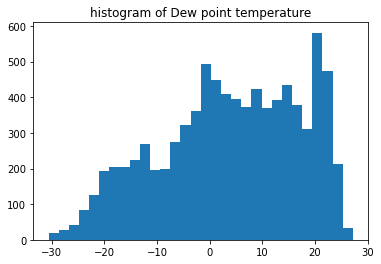

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


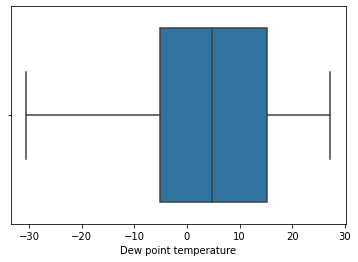

In [117]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Dew point temperature'], bins=30)
plt.title('histogram of Dew point temperature', fontsize=12)
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Dew point temperature'])
plt.show()

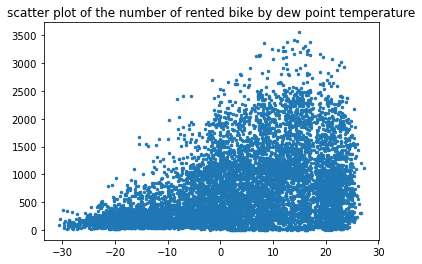

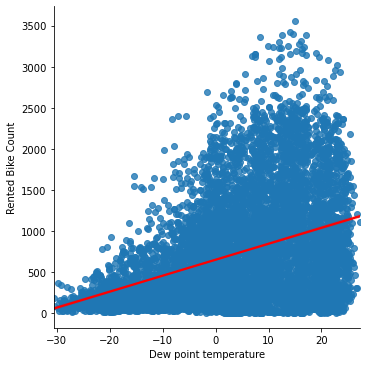

In [118]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Dew point temperature'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by dew point temperature')
sns.lmplot(x='Dew point temperature', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 이슬점 온도가 높아졌을 때 대여량이 증가하는 경우가 종종 나타난다. #약한 양의 상관관계를 보인다

-30.6
27.2


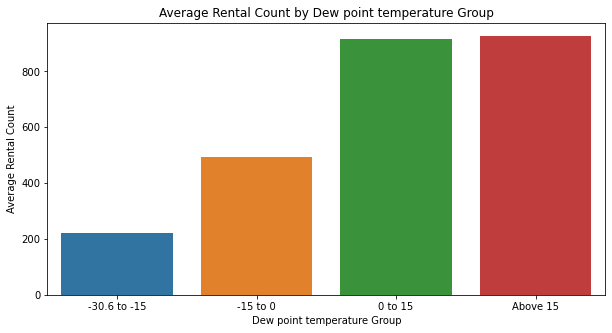

Text(0.5, 1.0, 'The number of bike rental by Dew point temperature')

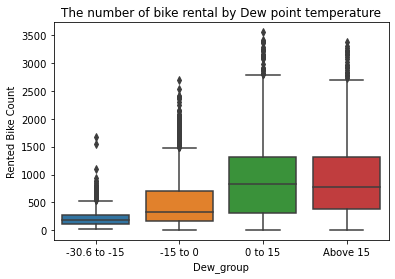

In [13]:
# 이슬점 온도를 범주화해서 분석해보기
print(min(data3['Dew point temperature'])) 
print(max(data3['Dew point temperature'])) 

# -30.6도 이상 -15도 미만, -15도 이상 0도 미만, 0도 이상 15도 미만, 15도 이상으로 구간을 나누기
bins = [-float('inf'),-15, 0, 15, float('inf')]
labels = ['-30.6 to -15', '-15 to 0', '0 to 15', 'Above 15'] # 각 구간의 라벨 설정
data3['Dew_group'] = pd.cut(data3['Dew point temperature'], bins=bins, labels=labels, include_lowest=True)

# 이슬점 온도 그룹별 평균 자전거 대여량 계산
data_dew_group = data3.groupby('Dew_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Dew_group', y='Rented Bike Count', data=data_dew_group)
plt.title('Average Rental Count by Dew point temperature Group')
plt.xlabel('Dew point temperature Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Dew_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by Dew point temperature')

## Solar Radiation(태양 복사열)

* 범주화 분석 결과, 태양 복사열이 3.0이상일 때 평균 대여량이 가장 높게 나타났다.
* 태양 복사열이 높아질수록 대여량의 중위수는 증가하는 추세를 보인다.

In [121]:
data3['Solar Radiation']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8460    0.0
8461    0.0
8462    0.0
8463    0.0
8464    0.0
Name: Solar Radiation, Length: 8465, dtype: float64

In [122]:
data3['Solar Radiation'].value_counts() #0이 많은 것 같아 빈도분석 해봄.

0.00    4151
0.01     124
0.02      78
0.03      65
0.06      61
        ... 
3.32       1
3.44       1
3.22       1
2.69       1
3.49       1
Name: Solar Radiation, Length: 345, dtype: int64

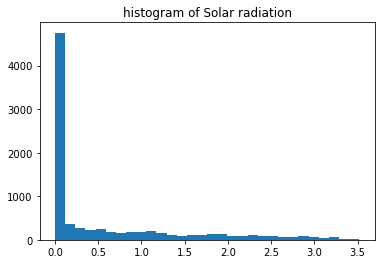

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


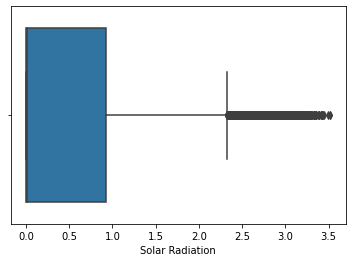

In [123]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Solar Radiation'], bins=30)
plt.title('histogram of Solar radiation', fontsize=12) #오른쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Solar Radiation'])
plt.show() # 0근처의 값이 데이터의 절반 이상을 차지하므로 이상치가 매우 많은 것으로 나타남.

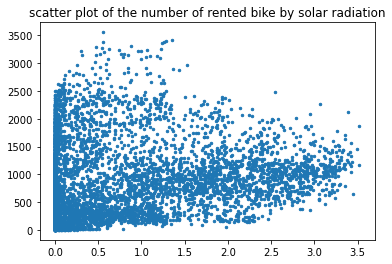

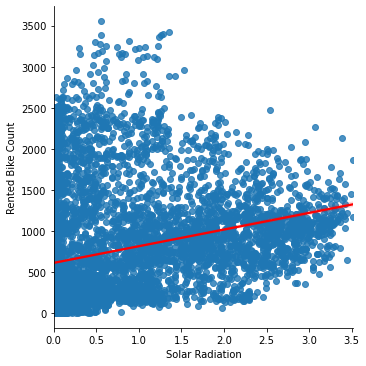

In [124]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Solar Radiation'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by solar radiation')
sns.lmplot(x='Solar Radiation', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 태양 복사열과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

0.0
3.52


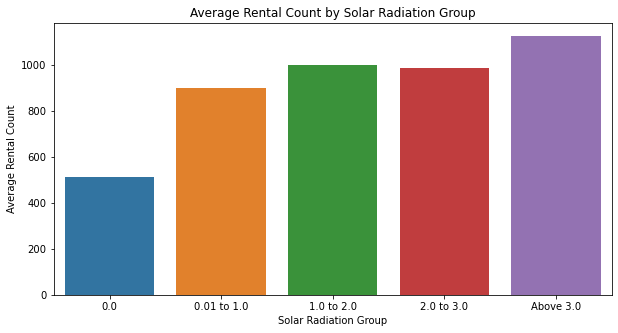

Text(0.5, 1.0, 'The number of bike rental by Solar Radiation')

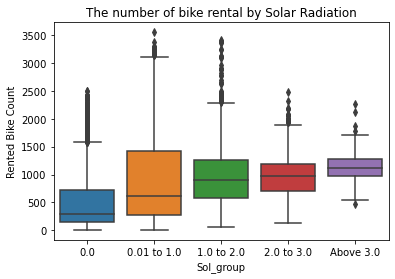

In [125]:
# 태양 복사열을 범주화해서 분석해보기
print(min(data3['Solar Radiation'])) 
print(max(data3['Solar Radiation'])) 

# 0.0,0.01 이상 1.0 미만, 1.0 이상 2.0 미만, 2.0 이상 3.0 미만 3.0 이상으로 구간을 나누기
bins = [0.0, 0.01, 1.0, 2.0, 3.0, float('inf')]
labels = ['0.0', '0.01 to 1.0', '1.0 to 2.0', '2.0 to 3.0', 'Above 3.0'] # 각 구간의 라벨 설정
data3['Sol_group'] = pd.cut(data3['Solar Radiation'], bins=bins, labels=labels, include_lowest=True)

# 이슬점 온도 그룹별 평균 자전거 대여량 계산
data_sol_group = data3.groupby('Sol_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Sol_group', y='Rented Bike Count', data=data_sol_group)
plt.title('Average Rental Count by Solar Radiation Group')
plt.xlabel('Solar Radiation Group')
plt.ylabel('Average Rental Count')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Sol_group', y='Rented Bike Count', data=data3)
plt.title('The number of bike rental by Solar Radiation')

# 태양 복사열이 높아질수록 대여량의 중위수는 증가하는 추세를 보인다.

## Rainfall(강수량)

* 대부분이 0의 값을 가짐.
* 자전거 대여량과 뚜렷한 선형관계가 나타나지 않음.

In [126]:
data3['Rainfall']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8460    0.0
8461    0.0
8462    0.0
8463    0.0
8464    0.0
Name: Rainfall, Length: 8465, dtype: float64

In [127]:
data3['Rainfall'].value_counts() # 강수량이 0인 경우가 7949로 전체 데이터의 대부분이 포함됨.

0.0     7949
0.5      114
1.0       64
1.5       55
0.1       44
        ... 
5.4        1
21.0       1
15.5       1
10.5       1
9.1        1
Name: Rainfall, Length: 61, dtype: int64

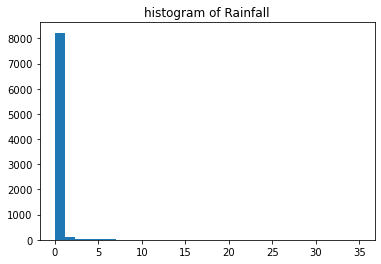

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


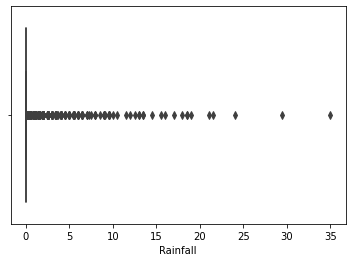

In [128]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Rainfall'], bins=30)
plt.title('histogram of Rainfall', fontsize=12) #오른쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Rainfall'])
plt.show() #전체 데이터 대부분이 강수량이 0이므로, 0 이외의 값은 이상치로 처리됨

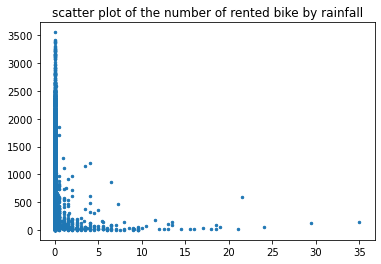

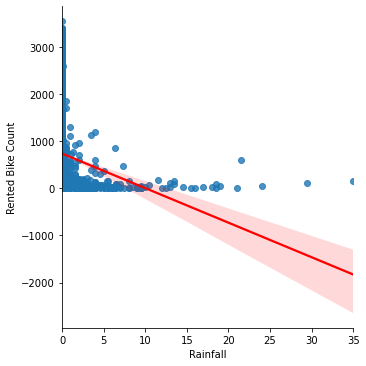

In [129]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Rainfall'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by rainfall')
sns.lmplot(x='Rainfall', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 강수량이 적은 날에 대여량의 최댓값이 위치해 있다.
# 강수량과 대여량 간에 뚜렷한 선형관계가 나타나지 않는다. 
# 선형관계로 파악하기보다 loess를 사용해보면 어떨까?
# 이차함수 곡선 형태로 비가 오면 급격히 대여량이 감소하므로 비가 오면 사람들이 자전거를 타지 않는다고 해석할 수 있다.

## Snowfall(적설량)

* 대부분이 0의 값을 가짐.
* 자전거 대여량과 뚜렷한 선형관계가 나타나지 않음.

In [130]:
data3['Snowfall']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8460    0.0
8461    0.0
8462    0.0
8463    0.0
8464    0.0
Name: Snowfall, Length: 8465, dtype: float64

In [131]:
data3['Snowfall'].value_counts() #적설량이 0인 경우가 전체 데이터의 대부분을 차지함.

0.0    8022
0.3      42
1.0      39
0.5      34
0.9      34
0.7      31
2.0      22
0.8      22
0.4      21
1.6      19
2.2      18
0.6      15
0.2      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
3.2       4
4.0       4
1.3       4
4.1       4
1.9       3
1.7       3
2.3       3
3.3       3
2.4       3
3.7       3
3.8       3
2.1       3
1.1       3
2.8       2
4.8       2
5.0       2
1.4       2
2.9       2
8.8       2
3.4       2
0.1       2
4.3       2
3.9       2
6.0       1
7.0       1
3.6       1
4.2       1
5.1       1
3.1       1
7.1       1
1.5       1
Name: Snowfall, dtype: int64

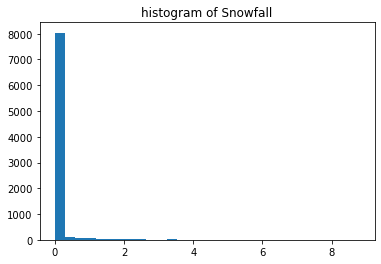

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


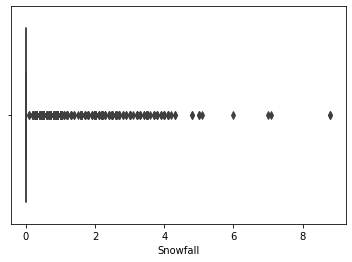

In [132]:
# 분포 확인하기
# 시각화 : 히스토그램
plt.hist(data3['Snowfall'], bins=30)
plt.title('histogram of Snowfall', fontsize=12) #오른쪽으로 skew되어 있음
plt.show()

# 시각화 : 박스플롯
sns.boxplot(data3['Snowfall'])
plt.show() #전체 데이터 대부분이 강수량이 0이므로, 0 이외의 값은 이상치로 처리됨

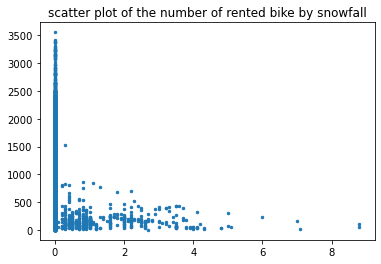

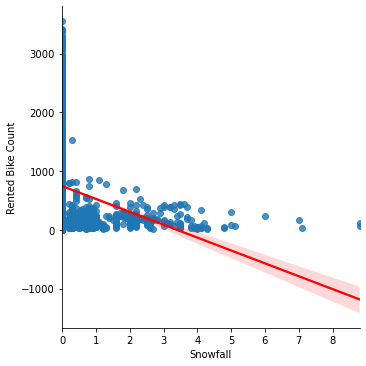

In [133]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data3['Snowfall'], data3['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by snowfall')
sns.lmplot(x='Snowfall', y='Rented Bike Count', data=data3, line_kws={'color': 'red'})

# 적설량이 적은 날에 대여량의 최댓값이 위치해 있다.
# 적설량과 대여량 간에 뚜렷한 선형관계가 나타나지 않는다.
# 선형관계로 파악하기보다 loess를 사용해보면 어떨까?
# 이차함수 곡선 형태로 비가 오면 급격히 대여량이 감소하므로 눈이 오면 사람들이 자전거를 타지 않는다고 해석할 수 있다.

## Seasons(계절)

* 여름, 봄, 겨울, 가을 순으로 데이터의 개수가 많지만 큰 차이는 없음(계절별 데이터 분포가 거의 동일함)
* 여름에 평균 자전거 대여량이 가장 높게 나타남

In [134]:
data3.Seasons #범주형 변수

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8460    Autumn
8461    Autumn
8462    Autumn
8463    Autumn
8464    Autumn
Name: Seasons, Length: 8465, dtype: object

In [135]:
data3.Seasons.value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

<AxesSubplot:xlabel='Seasons', ylabel='count'>

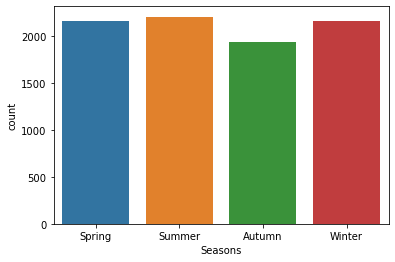

In [136]:
# 분포 확인하기
# 시각화 : 막대그래프
sns.countplot(x='Seasons', data=data3, order=['Spring','Summer','Autumn','Winter'])

In [137]:
# 자전거 대여량과의 관계 살펴보기
print(data3.groupby('Seasons').mean()['Rented Bike Count'].sort_values(ascending=False)) 

Seasons
Summer    1034.073370
Autumn     924.110480
Spring     746.254167
Winter     225.541204
Name: Rented Bike Count, dtype: float64


In [138]:
# 계절별 평균대여량을 data_mean_season이라는 새로운 데이터프레임에 저장 
data_mean_season = pd.DataFrame(data3.groupby('Seasons').mean()['Rented Bike Count'])
data_mean_season = data_mean_season.reset_index()
data_mean_season

,Seasons,Rented Bike Count
0,Autumn,924.110480
1,Spring,746.254167
2,Summer,1034.073370
3,Winter,225.541204


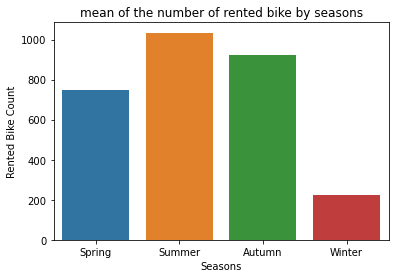

Text(0.5, 1.0, 'The number of bike rental by Seasons')

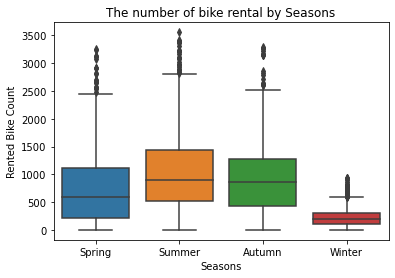

In [140]:
# 시각화 : 막대그래프
sns.barplot(x='Seasons', y='Rented Bike Count', data=data_mean_season, order=['Spring','Summer','Autumn','Winter'])
plt.title('mean of the number of rented bike by seasons')
plt.show()

# 여름, 가을, 봄, 겨울 순으로 평균 대여량이 많다.

# 시각화 : 박스플롯
sns.boxplot(x='Seasons', y='Rented Bike Count', data=data3, order=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.title('The number of bike rental by Seasons')

# 여름과 가을의 대여량 중위수는 거의 비슷하다.

## Holiday

* 데이터의 대부분이 공휴일이 아님.
* 공휴일이 아닌 경우의 평균 대여량은 공휴일인 경우 평균 대여량에 비해 약 1.5배 많음

No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64


<AxesSubplot:xlabel='Holiday', ylabel='count'>

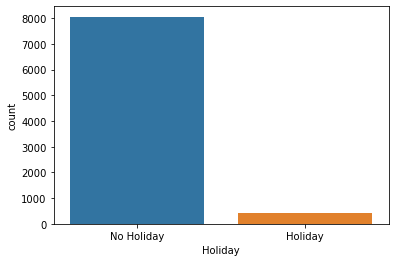

In [141]:
# 분포 확인하기
print(data3.Holiday.value_counts())

# 시각화
sns.countplot(x='Holiday', data=data3)

In [142]:
# 자전거 대여량과의 관계 살펴보기
print(data3.groupby('Holiday').mean()['Rented Bike Count'].sort_values(ascending=False)) 

# 공휴일이 아닌 경우와 공휴일인 경우의 평균 대여량은 약 1.5배 차이가 남

Holiday
No Holiday    739.284970
Holiday       529.154412
Name: Rented Bike Count, dtype: float64


In [143]:
# 계절별 평균대여량을 data_mean_holiday라는 새로운 데이터프레임에 저장 
data_mean_holiday = pd.DataFrame(data3.groupby('Holiday').mean()['Rented Bike Count'])
data_mean_holiday = data_mean_holiday.reset_index()
data_mean_holiday

,Holiday,Rented Bike Count
0,Holiday,529.154412
1,No Holiday,739.284970


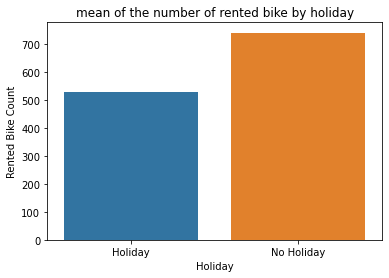

Text(0.5, 1.0, 'The number of bike rental by holiday')

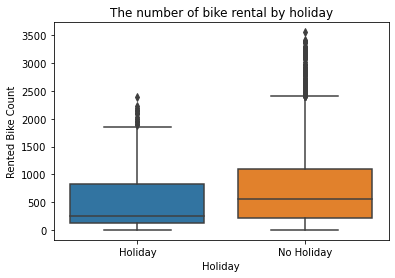

In [144]:
# 시각화 : 막대그래프
sns.barplot(x='Holiday', y='Rented Bike Count', data=data_mean_holiday)
plt.title('mean of the number of rented bike by holiday')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Holiday', y='Rented Bike Count', data=data3, order=['Holiday', 'No Holiday'])
plt.title('The number of bike rental by holiday')

# 공휴일이 아닐 때 평균 대여량이 더 높게 나타났다.
# 대여량의 중위수 역시 공휴일이 아닐 때가 더 높게 나타났다.